# ARIMA

An introduction to ARIMA forecasting with scalecast.  

- data: https://www.kaggle.com/datasets/rakannimer/air-passengers
- blog post: https://towardsdatascience.com/forecast-with-arima-in-python-more-easily-with-scalecast-35125fc7dc2e

In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv(r'C:\Users\jinlei\Documents\2023\mikekeith52\data\AirPassengers.csv')
f = Forecaster(
    y=df['#Passengers'],
    current_dates=df['Month'],
    future_dates = 12,
    test_length = .2,
    cis = True,
)
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=12
    Xvars=[]
    TestLength=28
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    CurrentEstimator=mlr
    GridsFile=Grids
)

## Naive Simple Approach
- this is not meant to be a demonstration of a model that is expected to be accurate
- it is meant to show the mechanics of using scalecast

In [3]:
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

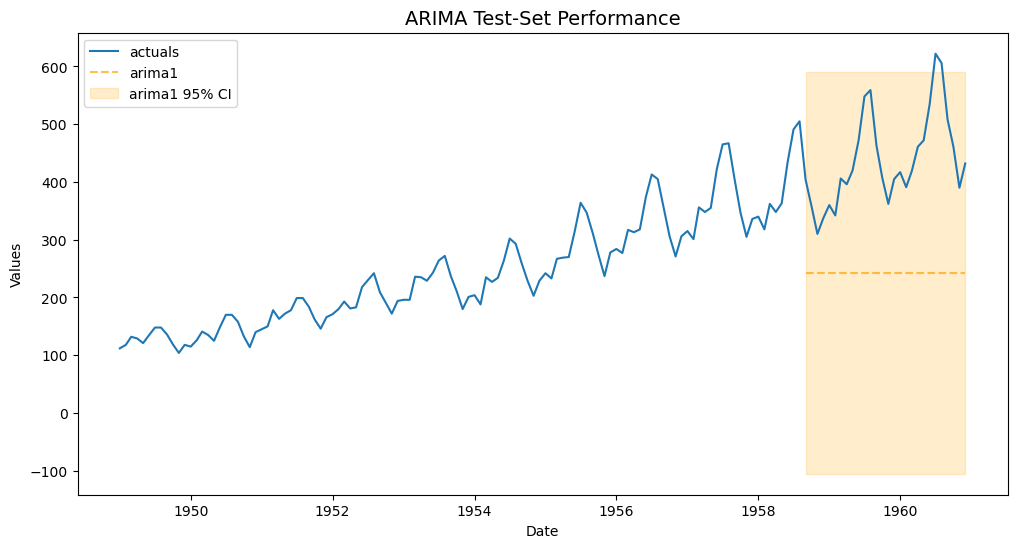

In [4]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

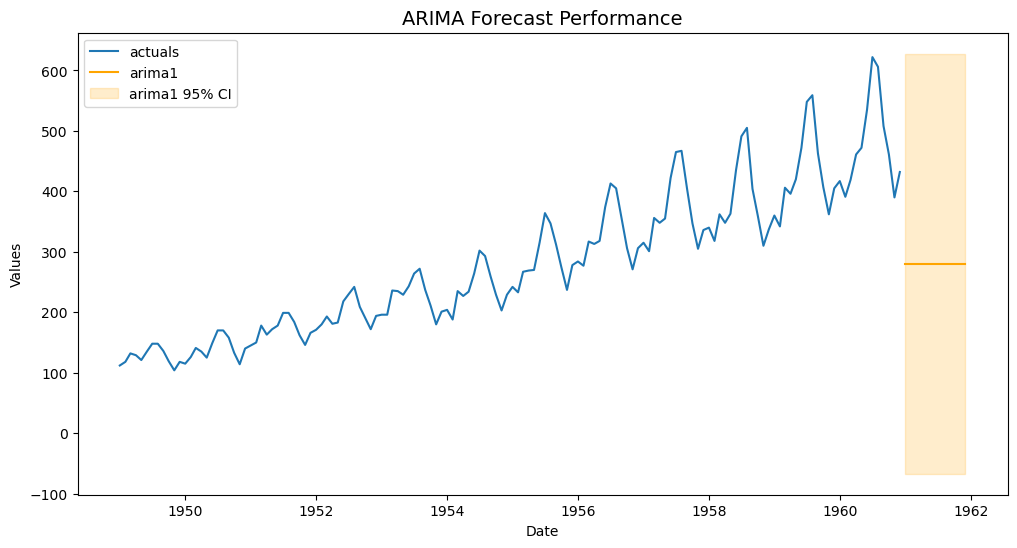

In [5]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

## Human Interpretation Iterative Approach
- this is a non-automated approach to ARIMA forecasting where model specification depends on human-interpretation of statistical results and charts

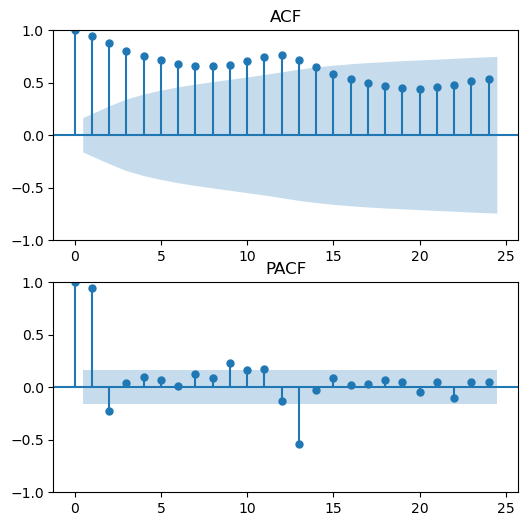

In [6]:
figs, axs = plt.subplots(2, 1,figsize=(6,6))
f.plot_acf(ax=axs[0],title='ACF',lags=24)
f.plot_pacf(ax=axs[1],title='PACF',lags=24)
plt.show()

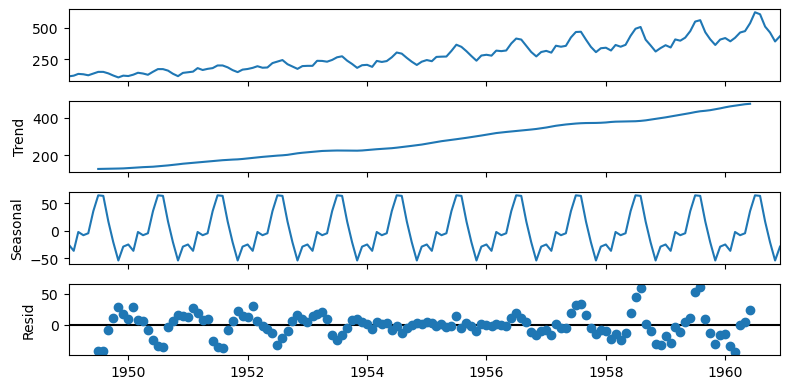

In [7]:
plt.rc("figure",figsize=(8,4))
f.seasonal_decompose().plot()
plt.show()

In [8]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

0.8153688792060512
0.991880243437641


In [9]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

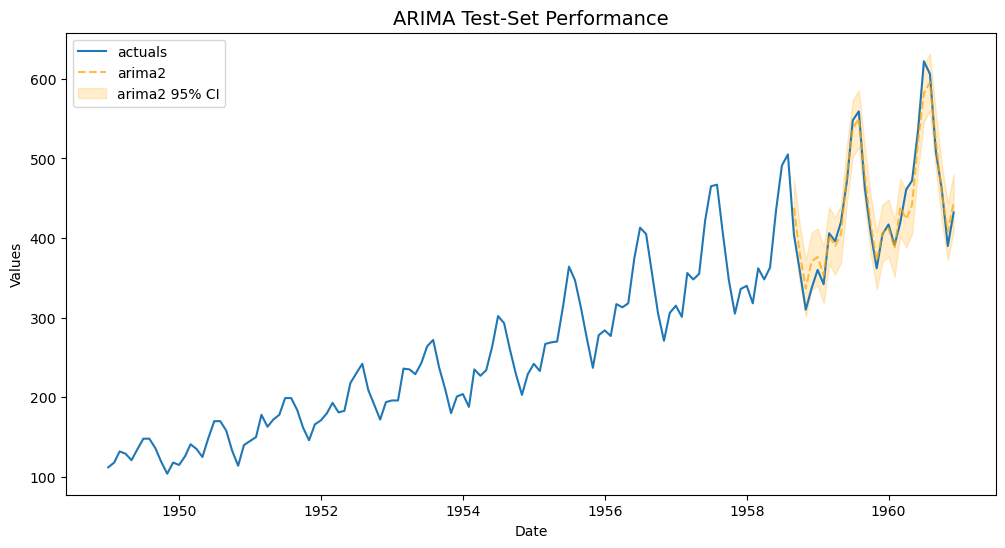

In [10]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

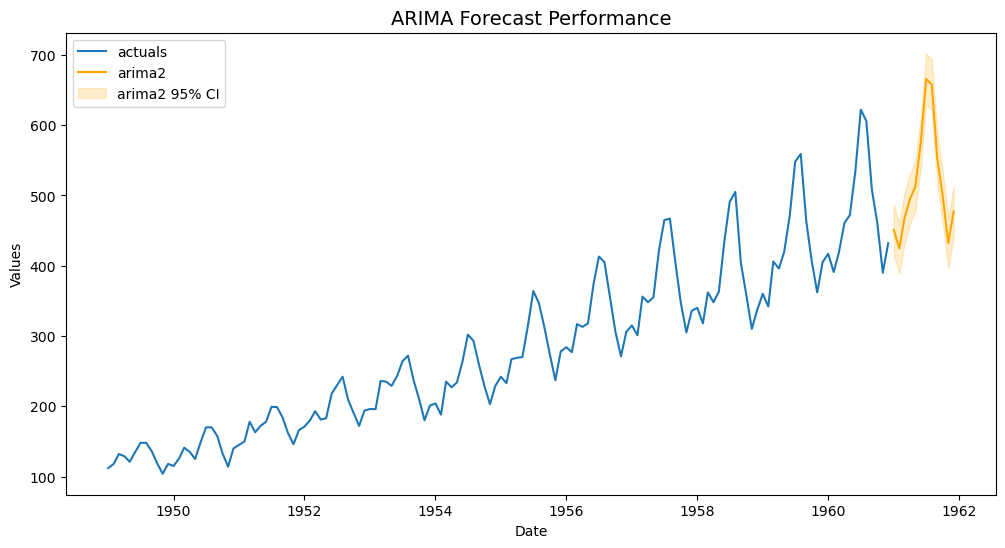

In [11]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [12]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.925
Date:                          Fri, 22 Sep 2023   AIC                           1015.850
Time:                                  13:29:36   BIC                           1033.102
Sample:                                       0   HQIC                          1022.860
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0763      0.275     -0.278      0.781      -0.614       0.462
ma.L1         -0.3539      0.249     -1.424      0.155      -0.841       0.133
ar.S.L12       0.6677      0.155      4.310      0.000       0.364       0.971
ar.S.L24       0.3314      0.099      3.347      0.001       0.137       0.525
ma.S.L12      -0.9791      1.475     -0.664      0.507      -3.870       1.912
sigma2       110.0781    140.932      0.781      0.435    -166.144     386.300
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.87
Prob(Q):                              0.99   Prob(JB):                         0.02
Heteroskedasticity (H):               2.77   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Auto-ARIMA Approach
`pip install pmdarima`

In [13]:
auto_arima(
    f,
    m=12,
    call_me='arima3',
)

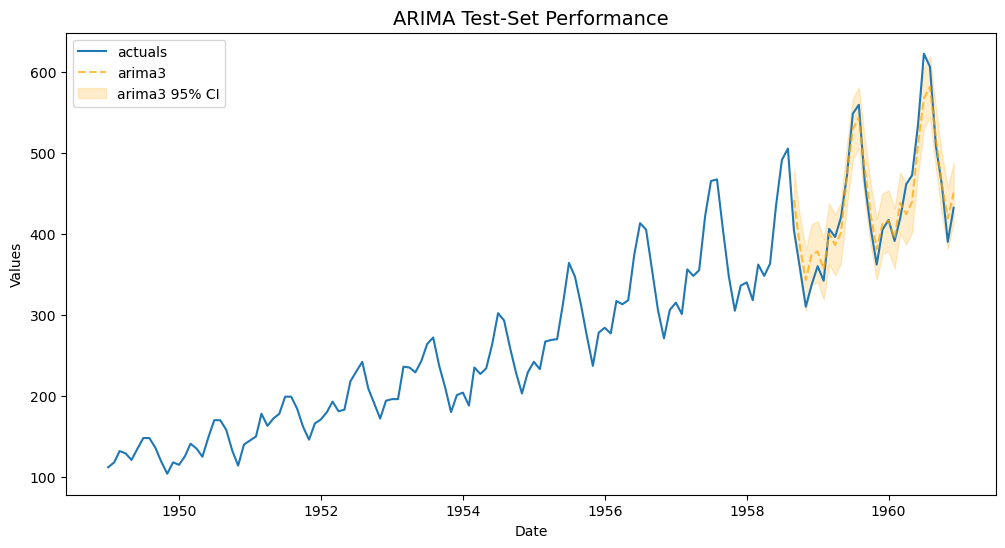

In [14]:
f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

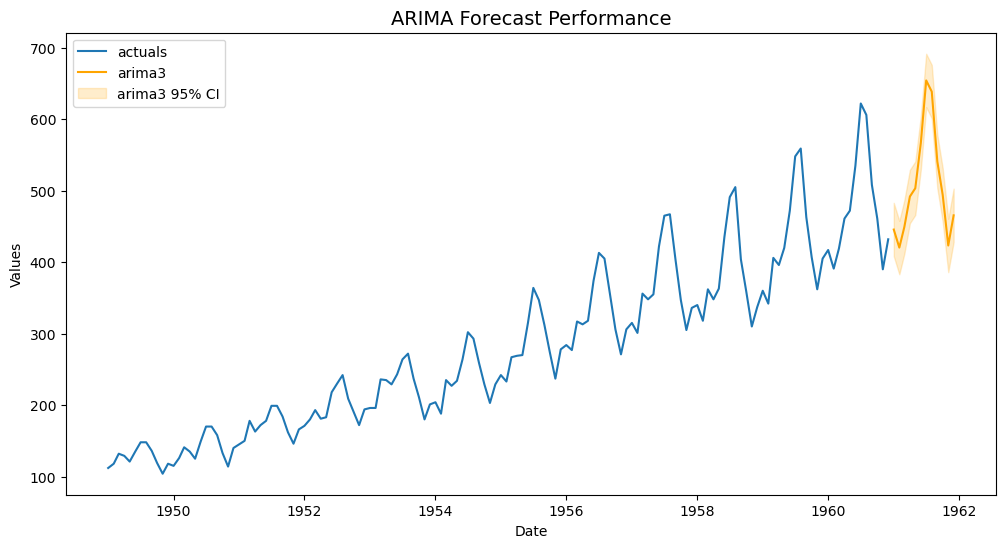

In [15]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [16]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  144
Model:             ARIMA(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                           Fri, 22 Sep 2023   AIC                           1017.847
Time:                                   13:30:10   BIC                           1029.348
Sample:                                        0   HQIC                          1022.520
                                           - 144                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3150     14.557      8.883      0.000     100.784     157.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Grid Search Approach

In [17]:
f.set_validation_length(12)
grid = {
    'order':[
        (1,1,1),
        (1,1,0),
        (0,1,1),
    ],
    'seasonal_order':[
        (2,1,1,12),
        (1,1,1,12),
        (2,1,0,12),
        (0,1,0,12),
    ],
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

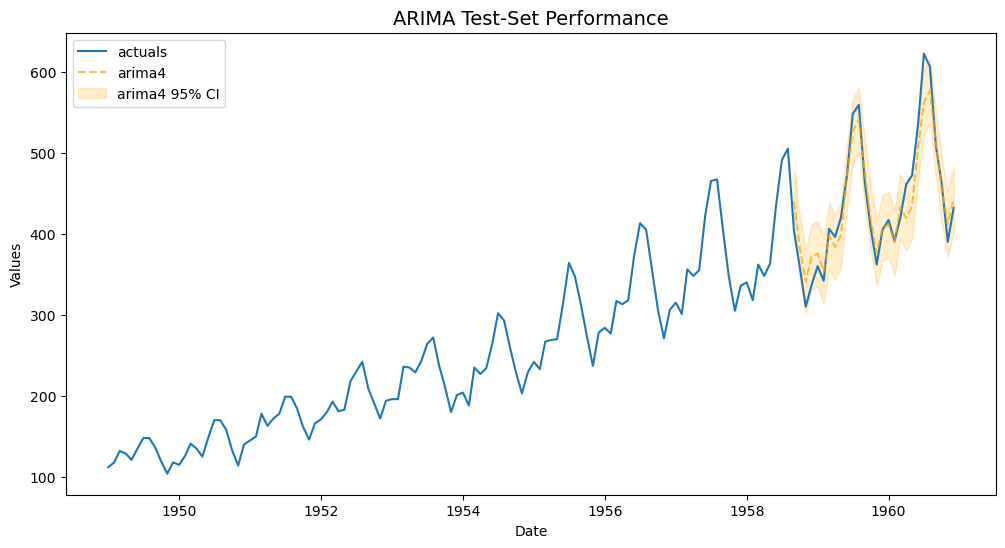

In [18]:
f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

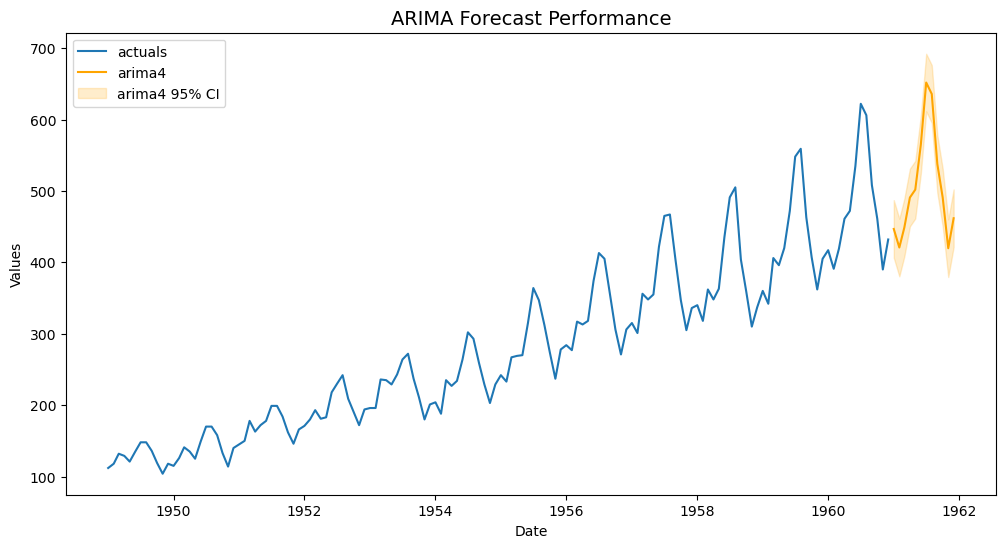

In [19]:
f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [20]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -508.319
Date:                           Fri, 22 Sep 2023   AIC                           1020.639
Time:                                   13:30:33   BIC                           1026.389
Sample:                                        0   HQIC                          1022.975
                                           - 144                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3184      0.063     -5.038      0.000      -0.442      -0.195
sigma2       137.2653     15.024      9.136      0.000     107.818     166.713
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.46
Prob(Q):                              0.95   Prob(JB):                         0.07
Heteroskedasticity (H):               2.37   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Export Results

In [21]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,excel_name='arima_results.xlsx',determine_best_by='TestSetMAPE')
summaries = results['model_summaries']
summaries[['ModelNickname','HyperParams','InSampleMAPE','TestSetMAPE']]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima2,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.044442,0.037155
1,arima4,"{'order': (0, 1, 1), 'seasonal_order': (0, 1, 0, 12)}",0.046529,0.044054
2,arima3,"{'order': (2, 1, 1), 'seasonal_order': (0, 1, 0, 12), 'trend': None}",0.045081,0.045936
3,arima1,{},0.442457,0.430066


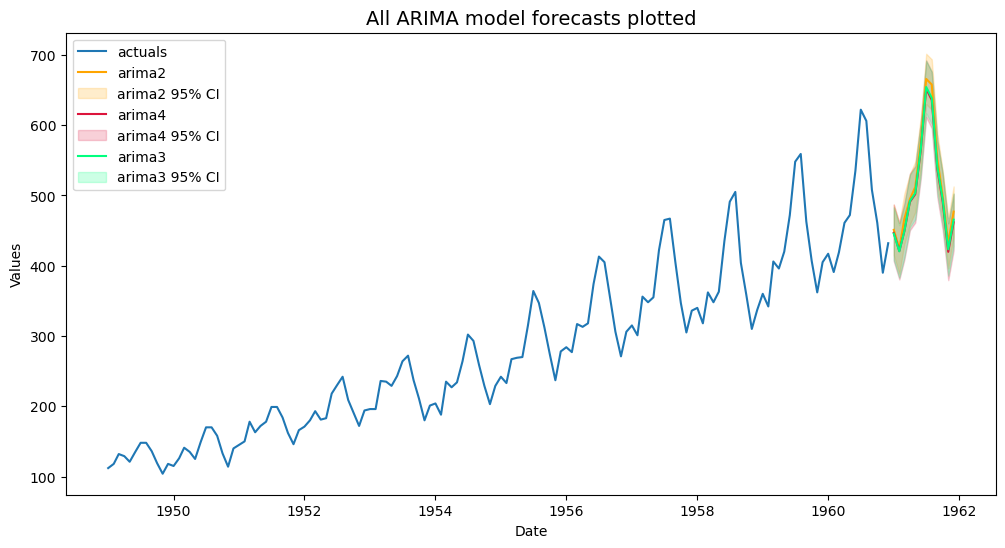

In [22]:
f.plot(ci=True,models=['arima2','arima3','arima4'],order_by='TestSetMAPE')
plt.title('All ARIMA model forecasts plotted',size=14)
plt.show()

In [ ]:
f.forecast